In [1]:
import pandas as pd

In [2]:
DATADIR = 'C:\\Users\\max\\JupiterProjects\\homework_42\\names\\'

In [3]:
names_by_year = {}
for year in range(1900, 2001, 1):
    names_by_year[year] = pd.read_csv('{}yob{}.txt'.format(DATADIR, year), names=['Names', 'Gender', 'Count'])
names_all = pd.concat(names_by_year, names=['Years', 'Pos'])

In [4]:
# достаем индексы годов для группировки
index_years = names_all.index.get_level_values(0)

In [5]:
# группируем по году и именам - количество имен людей с одинаковыми именами и разными полами суммируются
all_name_dynamics = names_all.groupby([index_years, 'Names']).sum()

In [6]:
# фильтруем по нужным нам именам и разворачиваем таблицу, имена теперь заголовки
name_dynamics = all_name_dynamics.query('Names == ["Ruth", "Robert"]').unstack('Names')

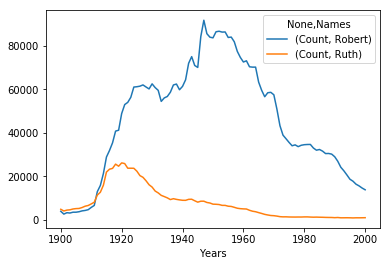

In [8]:
# строим график
name_dynamics.plot()